### k-최근접 이웃회귀의 한계
- 데이터 범위 밖의 새로운 데이터는 예측이 불가능하다는 것이다

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)
# 데이터가 많지 않기때문에 데이터를 나누지 않고 그냥 함

In [4]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [5]:
# k-최근접 이웃 회귀 알고리즘(이웃수 = 3)
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)
# 아까 평가지표가 제일 좋앗던 이웃수 3으로 피팅해서 확인해보기

KNeighborsRegressor(n_neighbors=3)

In [6]:
# 길이가 50cm인 생선의 무게 예측
knr.predict([[50]])
# 2차원 배열이니까 이렇게 담아야 되는거
# 1033gram으로 나옴

array([1033.33333333])

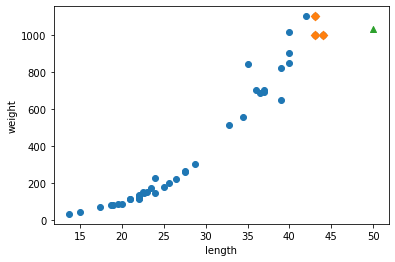

In [7]:
# 길이가 50cm인 생선의 주변 이웃들을 살펴보자
distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)
# 트레인 데이터만 스캐터 그래프로 그려보기
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(50, 1033, marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

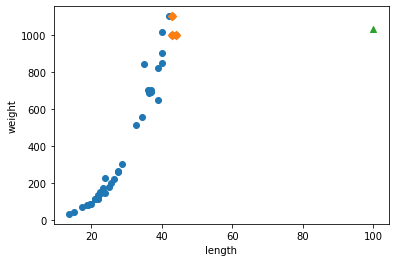

In [8]:
distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)
# 트레인 데이터만 스캐터 그래프로 그려보기
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(100, 1033, marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 새로운 데이터가 들어왓을때 정확한 예측이 어려운것을 확인

## LinearRegression 알고리즘

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 모델 학습
lr.fit(train_input, train_target)

LinearRegression()

In [10]:
lr.predict([[50]])
# 아까는 1033g이엇는데 1241g이 나옴
# 직선의방정식=a(각도)*l+b(절편) 이 공식에 의해서 나온것
# lr이 갖고잇음

array([1241.83860323])

In [11]:
print(lr.coef_, lr.intercept_)
# lr.coef_ : 기울기 (상관계수, 가중치라고도 부름)
# 아파트 가격을 결정짓는 많은 요소들은 '각각' 다른 가중치를 가지겟지
# lr.intercept_ : 절편
# 이런것들을 모델 파라미터(매개변수)라고 부름
# 얘네를 계속 바꿔가면서 최적의 직선을 찾는게 선형회귀

[39.01714496] -709.0186449535477


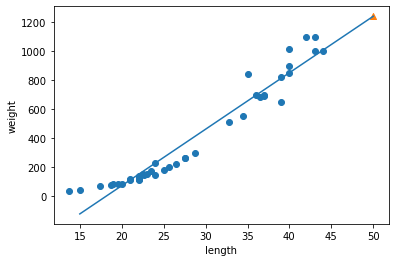

In [12]:
plt.scatter(train_input, train_target)
# 요 위에다가

# 15 ~ 50길이의 직선 그려보기
plt.plot([15, 50],[15 * lr.coef_ + lr.intercept_, 50* lr.coef_ + lr.intercept_])

plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# 잘그렷구나

In [13]:
# 트레이닝데이터 테스트데이터 확인
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))
# 93점 82점
# 과대적합이라고 말할 수 있을까? ^
# 과소적합을 의심해볼 수 있을까? o
# 그리고 그래프 상의 모든 점을 직선이 다 반영했다고 볼 수 있을까?
# 점의 분포는 약간 휘어있음
# 최적의 곡선을 찾아보자 => 다항회귀

0.939846333997604
0.8247503123313558


## 다항회귀

In [14]:
# 2차 방정식 그래프를 그리기 위해 길이를 제곱한 항을 추가하는 작업을 진행해야 한다
train_poly = np.column_stack((train_input ** 2, train_input))
# train데이터는 길이만 갖고 있기때문에 
# numpy의 컬럼스택을 이용해서 특성을두개(?) 만든다
test_poly = np.column_stack((test_input ** 2, test_input))

In [16]:
# 찍어보기
# 원래 길이에 특성 하나씩 늘엇음
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [17]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
# lr에 fit으로 학습시키기

LinearRegression()

In [18]:
# 예측해보기
# 이제 특성이 두개임 50을 제곱한것과 50
print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [19]:
# 기울기와 절편 찍어보기
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


- 우리가 구하려는 무게는
- 1.01 * 길이<sup>2</sup> + -21.6 * 길이 + 116.05

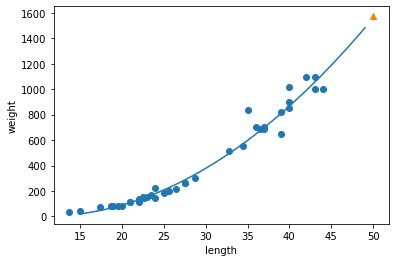

In [20]:
# 기울기와 절편이 준비됏으니 그래프를 그릴 수 있음

point = np.arange(15, 50)

plt.scatter(train_input, train_target)

plt.plot(point, 1.01*point**2 - 21.6 * point + 116.05)

plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 잘 반영된것같음

In [21]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))
# 괜찮긴한데 최고의 점수는 아니긴 함
# 아주 조금이지만 학습데이터보다 < 트레인데이터값이 크기때문에 과소적합을 의심해볼수도 잇다
# (훈련값이 더 크면 과대적합 의심)
# (이렇게 계속 반복하는거)
# 곡선(비선형)처럼 보이지만 선형회귀

0.9706807451768623
0.9775935108325121


In [22]:
# 과소적합이 남아있으면 모델을 쪼금 복잡하게 할 필요가 잇음
# 다중회귀를 사용

## k이웃에서는 k값을 낮추는 방식으로 했었음

# 특성공학과 규제

## 다중회귀(Multiple Regression)
- 여러개의 특성을 사용한 선형 회귀 알고리즘
- 특성공학 : 기존의 특성을 사용해 새로운 특성을 뽑아내는 것을 말한다
- ex) 몸무게를 결정짓는 요인중에 키 뿐만 아니라 두께 내장지방 근육 등 다양한 요인이 있음. 이 요인들을 곱해서 새로운 특성을 뽑아내는 것

In [48]:
df = pd.read_csv('https://raw.githubusercontent.com/rickiepark/hg-mldl/master/perch_full.csv')

In [49]:
raw = df.to_numpy()

In [68]:
# 생선의 길이, 높이, 두께를 이용한 회귀분석
raw

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

In [51]:
# target data
weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

## 훈련 세트와 테스트 세트로 분리

In [93]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    raw, weight, random_state=42)

# 순서도 중요하다!

### 사이킷런 변환기

In [94]:
# 다항식 변환기
from sklearn.preprocessing import PolynomialFeatures
# PolynomialFeatures : 현재 데이터를 다항식의 형태로 변경하는 역할을 수행

In [73]:
poly = PolynomialFeatures()
poly.fit([[2, 3]])
# 2랑 3을 가지고 사칙연산 등을 이용해 오만 값을 만들어낼 수 있다
poly.transform([[2, 3]])

array([[1., 2., 3., 4., 6., 9.]])

- 무게 = a*길이 + b*높이 + c*두께 + 1

In [74]:
# include_bias의 default값은 True : +1 (1을 곱하는 식)
# include_bias = False 하면 +1을 안담음
poly = PolynomialFeatures(include_bias = False)
poly.fit([[2, 3]])
poly.transform([[2, 3]])

array([[2., 3., 4., 6., 9.]])

In [95]:
poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
train_poly.shape
# 학습데이터만 넣고 돌려보기 (테스트데이터는x)
# 우리는 무게를 구하기 위해 오만 요인들을 가지고 돌릴 거니까
# 특성이 9개까지 늘어나ㅁ

(42, 9)

In [96]:
# 컬럼명 추출
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [97]:
test_input

array([[ 8.4 ,  2.11,  1.41],
       [18.  ,  5.22,  3.32],
       [27.5 ,  7.28,  4.57],
       [21.3 ,  6.38,  3.53],
       [22.5 ,  5.86,  3.62],
       [40.  , 11.14,  6.63],
       [30.  ,  7.62,  4.77],
       [24.6 ,  6.73,  4.17],
       [39.  , 11.14,  7.49],
       [21.  ,  5.69,  3.67],
       [43.5 , 12.6 ,  8.14],
       [16.2 ,  4.59,  2.63],
       [28.  ,  7.82,  4.2 ],
       [27.3 ,  8.32,  5.14]])

In [98]:
test_poly = poly.transform(test_input)

## 다중 회귀 모델

In [99]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [100]:
lr.score(train_poly, train_target)

0.9903183436982125

In [101]:
lr.score(test_poly, test_target)

0.9714559911594155

In [102]:
poly = PolynomialFeatures(degree=5, include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
train_poly = poly.transform(test_input)
train_poly.shape
# 특성이 55개로 늘어남

(14, 55)

In [109]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5,include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [103]:
train_poly.shape

(14, 55)

In [104]:
train_target.shape

(42,)

In [110]:
lr.fit(train_poly, train_target)
lr.score(train_poly, train_target)

0.9999999999938143

In [111]:
lr.score(test_poly, test_target)
# 특성을 늘린다고 다 좋은건 아니다
# 특성을 늘리면 훈련 세트는 거의 완벽하게 얻을 수 있지만
# 너무 훈련세트에 집중한 나머지 테스트 데이터에는 형편없는 결과(음수)를 가져다줌
# == 과대적합이 발생함
# 특성의 갯수를 줄여야함
# or 규제 줘보기

-144.40744532797535

### 규제 : 머신러닝 모델이 훈련세트를 너무 과도하게 학습하지 못하도록 훼방하는 것
- 모델이 훈련세트에 과대적합되지 않도록 만드는 것
- 선형 회귀 모델의 경우 특성에 곱해지는 계수(또는 기울기)의 크기를 작게 만드는 일이다.

- 그렇다면 과소적합을 규제하는 방법은 있을까?
- 특성공학을 통해 관측 데이터를 늘리면 애초에 과소적합이 발생할 여지가 없음

In [115]:
from sklearn.preprocessing import StandardScaler
# feature을 scaling(스케일링)
# 0에서 1사이 값으로 낮춤

# 먼저 인스턴스 객체를 만든다.
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)
# 우리가 특성공학으로 만든 train_poly를 가지고 피팅

### 릿지회귀

In [116]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
# 규제 학습시킴

print(ridge.score(train_scaled, train_target))
# 정확도 보기
# 훈련 데이터는 아까보다 살짝 낮아짐

0.9896101671037343


In [117]:
print(ridge.score(test_scaled, test_target))
# 테스트 데이터는 많이 올라옴
# 규제를 통해 두 데이터간의 차이를 줄임

0.9790693977615386


- 릿지 회귀(Ridge Regression) 모델 : 계수를 제곱한 값을 기준으로 규제 적용
- 라쏘 회귀(Lasso Regression) 모델 : 계수의 절대값을 기준으로 규제 적용
- 두 알고리즘 모두 계수의 크기를 줄이지만 라쏘는 아예 0으로 만들수도 있어서 일반적으로 릿지를 조금 더 선호한다.
- alpha : 릿지와 라쏘 모델을 사용할 때 규제의 양을 임의로 조절하는 하이퍼파라미터
- alpha 값이 크면 규제 강도가 세지므로 계수 값을 더 줄이고 조금 더 과소적합되도록 유도한다
- alpha 값이 작으면 계수를 줄이는 역할이 줄어들고 선형 회귀 모델과 유사해지므로 과대적합될 가능성이 크다
- 하이퍼 파라미터(Hyperparameter) : 머신러닝 모델이 학습할 수 없고 사람이 알려줘야 하는 파라미터

In [125]:
# 훈련세트와 테스트세트의 점수가 가장 가까운 지점이 최적의 alpha값이 된다
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    # 릿지모델
    ridge = Ridge(alpha=alpha)
    # 릿지모델 훈련
    ridge.fit(train_scaled, train_target)
    # 결정계수(R2 score)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

In [126]:
import matplotlib as mpl
mpl.rcParams['font.family'] ='D2coding' # 원하는 글꼴
mpl.rcParams['axes.unicode_minus'] =False

C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Anaconda3\lib\site-pack

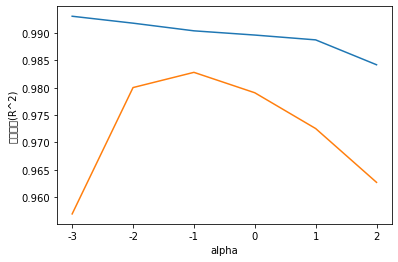

In [127]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('결정계수(R^2)')
plt.show()

# 파란색이 훈련세트
# 주황색이 테스트세트

- 적절할 alpha 값은 두 그래프가 가장 가깝고 테스트 세트의 점수가 가장 높은 지점
- -1, 10^1 = 0.1

- 맨 첫부분은 전형적인 과대적합(갭이 큼)
- 맨 끝부분은 과소적합으로 가는 길(둘 다 점수가 낮아짐)

In [128]:
ridge = Ridge(alpha=alpha)
    # 릿지모델 훈련
ridge.fit(train_scaled, train_target)
    # 결정계수(R2 score)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

# 둘 다 점수가 높고
# 점수차이가 많이 나지 않음
# 좋은 모델

0.9841843235774494
0.9627042641050291


### 라쏘 회귀

In [135]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
# 규제 학습시킴
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421884


In [137]:
# 훈련세트와 테스트세트의 점수가 가장 가까운 지점이 최적의 alpha값이 된다.
train_score = []
test_score = []

alpha_list = [0.001,0.01,0.1,1,10,100]

#랏소 모델 만들기
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha)
    #랏소모델 훈련
    lasso.fit(train_scaled,train_target) #랏소 학습
    #결정계수(R2 score)
    train_score.append(lasso.score(train_scaled, train_target)) #훈련 세트 점수 저장
    test_score.append(lasso.score(test_scaled, test_target)) #테스트 세트 점수 저장

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23364.075969939724, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20251.975097475362, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 806.2370926335934, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(


C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Anaconda3\lib\site-pack

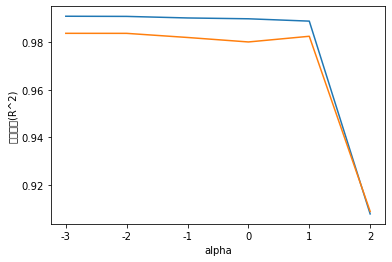

In [138]:
plt.plot(np.log10(alpha_list), train_score)

#하나 더 테스트 데이터가 있어야 하니깐
plt.plot(np.log10(alpha_list), test_score)

plt.xlabel('alpha')
plt.ylabel('결정계수(R^2)')
plt.show()

In [139]:
np.sum(lasso.coef_ == 0)
# 릿지를 선호한다 라쏘는 0으로 만드는 경우가 많기때문..
# 0이 몇개나 만들어졋나 확인
# 이 값은 사람마다 다를 수 있음

52

# 실습문제 : 보스턴 집값 예측

In [234]:
from sklearn.datasets import load_boston

boston = load_boston()
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [225]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [2]:
class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, n_jobs=1)

SyntaxError: invalid syntax (Temp/ipykernel_22920/2950134702.py, line 1)

In [232]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# boston 데이터 세트 로드
boston = load_boston()

# boston 데이터 세트 DataFrame 변환
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

# boston 데이터 세트의 target 배열은 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함
bostonDF['PRICE'] = boston.target
print('Boston 데이터 세트 크기 : ', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기 :  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


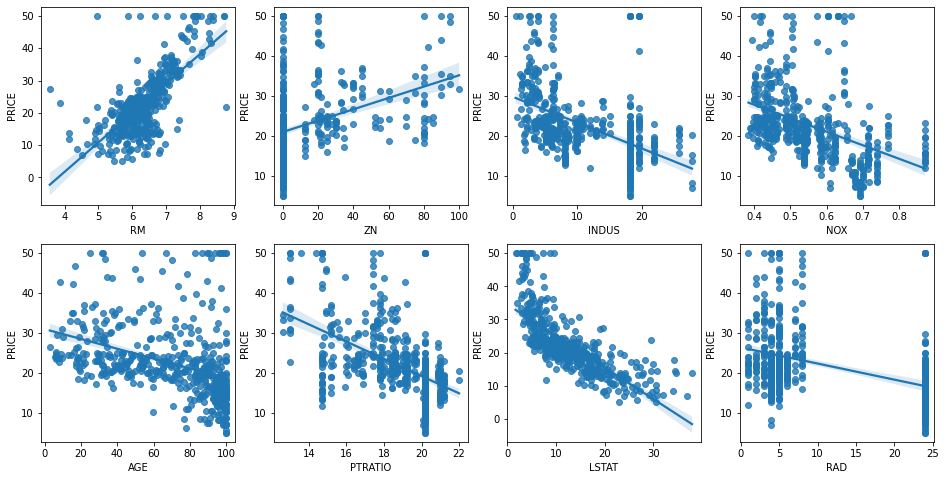

In [235]:
# 2개의 행과 4개의 열을 가진 subplots를 이용, axs는 4x2개의 ax를 가짐
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

In [236]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3,
                                                   random_state=156)

# 선형 회귀 OLS로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [237]:
print('절편 값 : ', lr.intercept_)
print('회귀 계수값 :',np.round(lr.coef_, 1))

절편 값 :  40.995595172164336
회귀 계수값 : [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [174]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [212]:
print(boston.data.shape)

(506, 13)


In [213]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [214]:
data = pd.DataFrame(boston.data)
data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [215]:
data.columns = boston.feature_names
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


CRIM: 범죄율

INDUS: 비소매상업지역 면적 비율

NOX: 일산화질소 농도

RM: 주택당 방 수

LSTAT: 인구 중 하위 계층 비율

B: 인구 중 흑인 비율

PTRATIO: 학생/교사 비율

ZN: 25,000 평방피트를 초과 거주지역 비율

CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0

AGE: 1940년 이전에 건축된 주택의 비율

RAD: 방사형 고속도로까지의 거리

DIS: 직업센터의 거리

TAX: 재산세율

In [216]:
data['Price'] = boston.target
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


- 다중공선성
- 독립 변수X는 종속변수 Y하고만 상관 관계가 있어야 하며, 독립 변수X들끼리 상관관계가 있어서는 안된다
- 독립 변수간 상관 관계를 보이는 것을 다중공선성(Multicollinearity)라고 한다
- 다중공선성이 있으면 부정확한 회귀 결과가 도출될 수 있다
- 변수 a, b, c, d, e 중에 
- 종속변수가 e면 독립변수는 a,b, c, d가 되는데
- a와 b가 너무 비슷하면 비교하는 의미가 없으니까
- a와 b 둘 중 하나를 삭제해서 변수를 거른다

- 다중공선성 확인하는 법
1. 산점도 그래프
- plt.show()
- OLS Regression Result 하단에 [2]The condition number is large...

2. VIF(Variance Infltion Factors, 분산팽창요인)
- 보통 VIF가 10이 넘으면 다중공선성이 있다고 판단한다

In [217]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [223]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
vif['features'] = data.columns
vif = vif.sort_values('VIF Factor').reset_index(drop=True)
vif

# 변수 몇개만 빼면 다 10을 넘음 -> 다중공선성이 있다
# 다중공선성이 없는 변수 세가지는 무조건 하고
# 나머지 변수들 중에 대표할만한 변수를 추려야 함

,VIF Factor,features
0,1.176266,CHAS
1,2.131404,CRIM
2,2.910004,ZN
3,12.615188,LSTAT
4,14.485874,INDUS
5,15.369980,RAD
6,15.430455,DIS
7,21.351015,B
8,21.398863,AGE
9,24.503206,Price


In [ ]:
# 보스턴 집 값 예측..
# 집 값의 종속변수가 뭔지 파악하고
# 나머지 변수가 각각 뭘 의미하는지 알아야함

In [171]:
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)
bostonDF['PRICE'] = boston.target
print(bostonDF)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.

In [177]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['target'] = boston.target
print(df.head)

<bound method NDFrame.head of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  target  
0       15.3  396.90   4.98    

In [178]:
print(df.tail())

        CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  target  
501     21.0  391.99   9.67    22.4  
502     21.0  396.90   9.08    20.6  
503     21.0  396.90   5.64    23.9  
504     21.0  393.45   6.48    22.0  
505     21.0  396.90   7.88    11.9  


In [180]:
print(df.shape)
print(df.describe())

(506, 14)
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861

In [193]:
from sklearn import datasets
from sklearn import model_selection
from sklearn.linear_model import Lasso
from sklearn import metrics

dataset = datasets.load_boston()
x_data = dataset.data
y_data = dataset.target

In [196]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data, y_data, test_size=0.3)

estimator = Lasso(alpha=1.0)

estimator.fit(x_train, y_train)

Lasso()

In [197]:
y_predict = estimator.predict(x_train) 
score = metrics.r2_score(y_train, y_predict)
print(score) #1.0

0.684538430993715


In [198]:
y_predict = estimator.predict(x_test) 
score = metrics.r2_score(y_test, y_predict)
print(score) #1.0

0.6306763483963691


In [200]:
from sklearn.linear_model import Ridge

In [201]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data, y_data, test_size=0.3)

estimator = Ridge(alpha=1.0)

estimator.fit(x_train, y_train)

Ridge()

In [202]:
y_predict = estimator.predict(x_train) 
score = metrics.r2_score(y_train, y_predict)
print(score)

0.7266107176844425


In [203]:
y_predict = estimator.predict(x_test) 
score = metrics.r2_score(y_test, y_predict)
print(score) 

0.7470428670136667


# 실습문제 : 당뇨병 진행도 예측

In [210]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = dataset.target
print(dataset.DESCR)

ValueError: Length of values (506) does not match length of index (442)

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(
    raw, weight, random_state=42)